In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
credito = pd.read_csv('Dados/Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
# Removendo a coluna Classe
previsores = credito.iloc[:,0:20].values
previsores[0]

array(['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
       "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
       "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [5]:
# Isolando a coluna Classe
classe = credito.iloc[:,20].values
classe[0]

'good'

In [6]:
# Transformando atributos categóricos em números, pois o GaussianNB não trabalha com atributos categóricos
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

previsores[0]

array([2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
      dtype=object)

In [7]:
# Bases de treinamento e de teste

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,classe,test_size=0.3, random_state = 0)

In [9]:
# Treinamento do modelo
svm = SVC()
svm.fit(x_treinamento,y_treinamento)

/home/irbraga/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
# Previsões
previsoes = svm.predict(x_teste)

In [12]:
# Comparar as previsões com a massa de original
confusao = confusion_matrix(y_teste,previsoes)
confusao

array([[  0,  86],
       [  0, 214]])

In [13]:
# Cálculo das taxas de acertos e erros
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto

taxa_acerto

0.7133333333333334

/home/irbraga/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


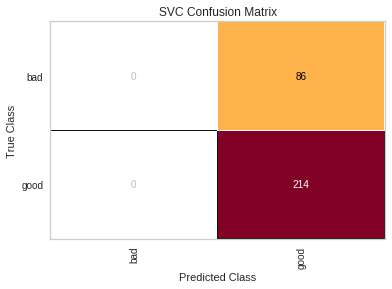

In [15]:
from yellowbrick.classifier import ConfusionMatrix

v = ConfusionMatrix(SVC())
v.fit(x_treinamento,y_treinamento)
v.score(x_teste,y_teste)
v.poof()

In [18]:
# Avaliando novos registros não pertencentes a massa de treinamento/teste

novo_credito = pd.read_csv('Dados/NovoCredit.csv')
novo_credito = novo_credito.iloc[:,0:20].values

In [19]:
novo_credito[:,0] = labelencoder.fit_transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder.fit_transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder.fit_transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder.fit_transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder.fit_transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder.fit_transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder.fit_transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder.fit_transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder.fit_transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder.fit_transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder.fit_transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder.fit_transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder.fit_transform(novo_credito[:,19])

novo_credito[0]

array([0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0],
      dtype=object)

In [21]:
# Previsão
svm.predict(novo_credito)[0]

'good'

In [26]:
# Identificar os atributos com maior importância para as tomadas de decisão
forest = ExtraTreesClassifier()
forest.fit(x_treinamento,y_treinamento)
importancias = forest.feature_importances_
importancias

/home/irbraga/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.10479243, 0.09106742, 0.06121018, 0.06139696, 0.09290627,
       0.0471638 , 0.04896541, 0.04585823, 0.0384278 , 0.02102129,
       0.05444562, 0.06187603, 0.06486284, 0.03406241, 0.03686659,
       0.03417995, 0.03951031, 0.02632088, 0.02669149, 0.00837408])

In [30]:
# Utilizar os atributos selecionados para treinar um novo modelo

x_treinamento_2 = x_treinamento[:,[0,1,2,3]]
x_teste_2 = x_teste[:,[0,1,2,3]]

In [31]:
# Treinamento do novo modelo
svm2 = SVC()
svm2.fit(x_treinamento_2,y_treinamento)

/home/irbraga/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
# Previsões
previsoes_2 = svm2.predict(x_teste_2)

In [35]:
# Comparar as previsões com a massa de original
confusao2 = confusion_matrix(y_teste,previsoes_2)
confusao2

array([[ 24,  62],
       [ 20, 194]])

In [36]:
# Cálculo das taxas de acertos e erros
taxa_acerto_2 = accuracy_score(y_teste, previsoes_2)
taxa_erro_2 = 1 - taxa_acerto_2

taxa_acerto_2

0.7266666666666667